## Final Project
#### By: Joseph Wong, Ruben Regalado, Rory Huck

### How do non-academic factors influence students academic success?

#### Loading in the data

##### Joseph

In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'



# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [116]:
file_name = 'MentalHealthSurvey.csv'
DF_raw = pd.read_csv(file_name)

**Data Source**

I got my data from kaggle.com on a dataset labelled "Student Mental Health Survey: Online Survey on the Mental Health of IT Student" by Abdullah Ashfaq. A free account on Kaggle is required to download the dataset, but is publically viewable online. It was last updated 3 months ago. The data was gathered through an online survey and responses where anonymized to keep confidentiality. A possible ethical concern is that only IT students were given the opportunity to take the survey, meaning many groups, such as college students with other majors, are unrepresented by the dataset. The data explores the students' demographic data (while keeping their anonymity), lifestyle, experiences, university campus, self-reported mental health levels, and coping mechanisms.
We will use cumulative GPA as an indicator of student success, as it is a reflection of their dedication and performance to their courses.

**Variable Definitions**
* **'sports_engagement':** monthly sports engagement
* **'depression':** self-reported feeling of depression (1-5)
* **'anxiety':** self-reported feeling of anxiety (1-5)
* **'isolation':** self-reported feeling of isolation (1-5)
* **'future_insecurity':** self-reported feeling of future insecurity (1-5)

**Data Scope**

There are 4 different majors included in the dataset, all of which are related to Information Technology. The most frequent is Data Science, followed by Computer Science, then Information Technology, and finally Software Engineering.

The dataset mostly represents to male and female undergraduate students (moreso male) ages 18-22 majoring in an Information Technology field universities in Pakistan. Based on this representation, it can be applied to other undergraduate students with caution, taking into consideration geographical and cultural differences between Pakistan and other countries that may influence outcomes.

##### Ruben

In [121]:
file_name = 'StudentsPerformance.csv'
DF_ruben = pd.read_csv(file_name)

**Data Source**

I got my data from Kaggle.com from a dataset named 'Students Performance in Exams' by Jakki Seshapanpu. This data comes from a site where the data is allowed to be used for data explorations, all that is needed to access the data is a Kaggle account. This data was gathered from various students which included their total scores, the score breakdown and indvidiual aspects of the studnets daily life before the exam was taken.

**Variable Definitions**
* **Gender:** This is a categoral varible that tells us the gender of the observed student
* **Race/Ethnicity:** This is also a categorical varialbe that tells us what race group the student is in, however we dont know which race correlates to each letter.
* **Parental level of eduacation:** Categorical variable that tells us their parent(s) highest level of education
* **lunch:** Categorical variable that tells us whether or not the student had lunch before taking the exam
* **test preperation course:** Categorical variable that tells us if the student took a test preperation course prior to the exam
* **math score:** Numerical variable that tells us the students math score
* **reading score:** Numerical variable that tells us the studnets reading score
* **writing score:** Numerical variable that tells us the studnets writing score

##### Rory

In [125]:
df_rory = pd.read_csv('OECD.csv')

**NOTES:**

-All data is refering to both males and females from the ages of 25 to 64 in the year 2023

-Educational attainment refers to the highest level of education completed by a person, shown as a percentage of all persons in that age group. Below upper secondary education includes early childhood education, primary education or lower secondary education. Programmes at the lower secondary education level are designed to lay the foundation across a wide range of subjects. Programmes at the upper secondary level are more specialised and offer students more choices and diverse pathways for completing their secondary education. Tertiary education includes short-cycle tertiary education, bachelor’s, master’s, or doctoral or equivalent levels.

-LINK: https://data-explorer.oecd.org/vislc=en&fs[0]=Topic%2C0%7CEducation%20and%20skills%23EDU%23&fs[1]=Topic%2C1%7CEducation%20and%20skills%23EDU%23%7CEducation%20attainment%23EDU_ATT%23&pg=0&fc=Topic&snb=4&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_EAG_LSO_EA%40DF_LSO_NEAC_DISTR_EA_MIGR&df[ag]=OECD.EDU.IMEP&df[vs]=1.0&dq=._T.Y25T64.ISCED11A_0T2%2BISCED11A_3_4%2BISCED11A_5T8....NB%2BFB._Z%2B_T.....OBS...A3&lom=LASTNOBSERVATIONS&lo=1&pd=2020%2C2023&to[TIME_PERIOD]=true&lb=nm
Citation:

OECD (2024) Education at a Glance 2024 Sources, Methodologies and Technical Notes, OECD Publishing Paris,

https://doi.org/10.1787/e7d20315-en.

#### Analysis 

#### Rory

In [129]:
my_columns = ['TIME_PERIOD','Reference area','Educational attainment level','Place of birth','OBS_VALUE']
df_rory[my_columns].sort_values('Reference area')
DF_rory=df_rory[my_columns].sort_values('Reference area')

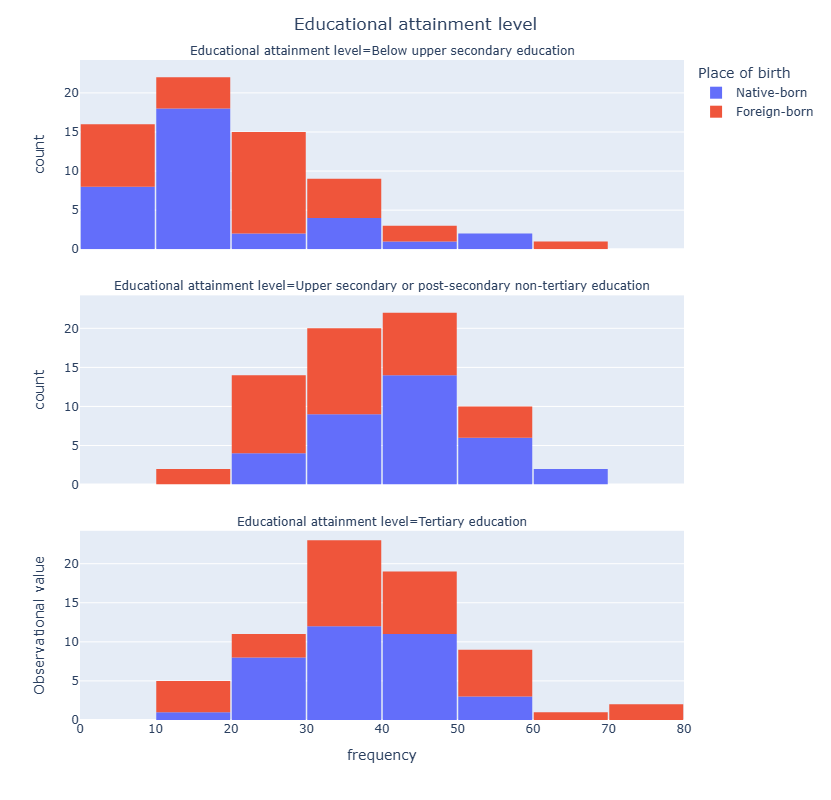

In [130]:
fig = px.histogram(DF_rory,
                 x='OBS_VALUE',
                 nbins=10,
                 facet_col= 'Educational attainment level',
                 facet_col_wrap=1,
                  color='Place of birth')

fig.update_layout(bargap=0.02,
                  title='Educational attainment level',
                  title_x=0.5,
                  xaxis_title="frequency",
                  yaxis_title="Observational value",
                  autosize=False,
                  width=1000,
                  height=800)

fig.show()

In [131]:
mask = DF_rory['Educational attainment level'] == 'Tertiary education'
DF_rory_T = DF_rory[mask].copy()

In [132]:
mask = DF_rory['Educational attainment level'] == 'Upper secondary or post-secondary non-tertiary education'
DF_rory_S = DF_rory[mask].copy()

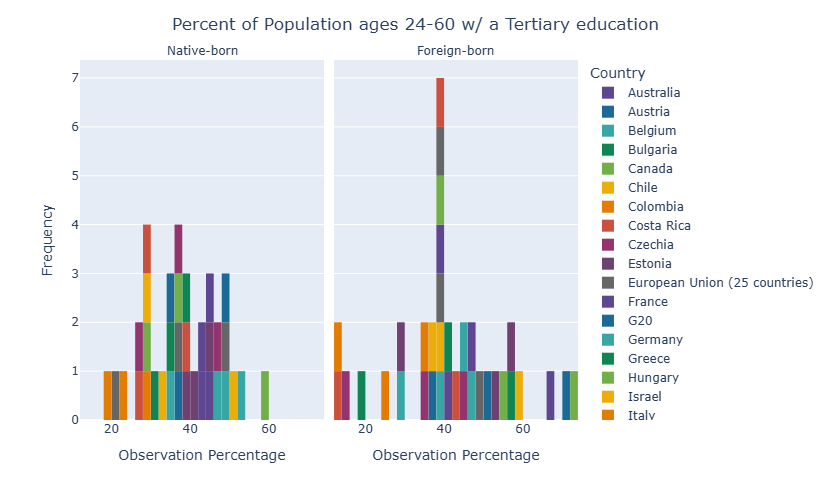

In [133]:
fig = px.histogram(DF_rory_T,
                 x='OBS_VALUE',
                 nbins=30,
                 facet_col= 'Place of birth',
                 facet_col_wrap=2,
                  color='Reference area',
                  color_discrete_sequence=px.colors.qualitative.Prism,
                  category_orders={'origin' : ["Native-Born","Foreign-Born"]})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title_text='Observation Percentage')
fig.update_layout(bargap=0.02,
                  title='Percent of Population ages 24-60 w/ a Tertiary education',
                  title_x=0.5,
                  xaxis_title="Observation Percentage",
                  yaxis_title="Frequency",
                  legend_title="Country",
                  autosize=False,
                  width=1200,
                  height=500)

fig.show()

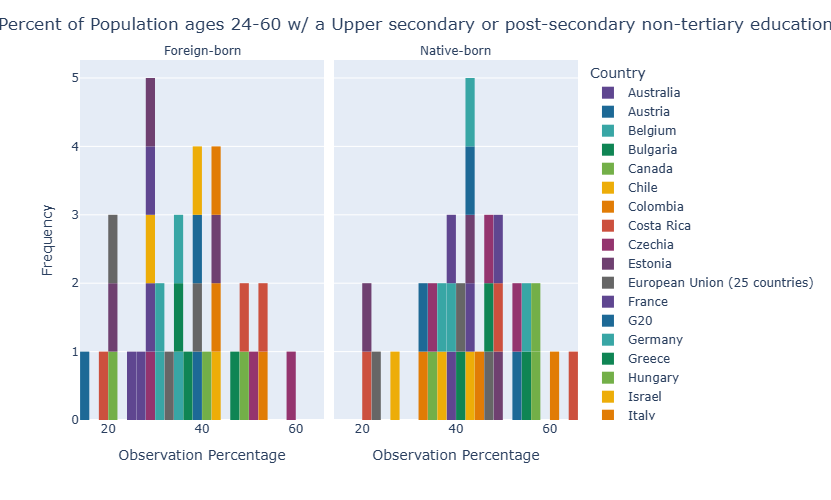

In [134]:
fig = px.histogram(DF_rory_S,
                 x='OBS_VALUE',
                 nbins=30,
                 facet_col= 'Place of birth',
                 facet_col_wrap=2,
                  color='Reference area',
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title_text='Observation Percentage')
fig.update_layout(bargap=0.02,
                  title='Percent of Population ages 24-60 w/ a Upper secondary or post-secondary non-tertiary education',
                  title_x=0.5,
                  xaxis_title="Observation Percentage",
                  yaxis_title="Frequency",
                  legend_title="Country",
                  autosize=False,
                  width=1200,
                  height=500)

fig.show()

In conclusion, the country with the highest percentage of their population with a Tertiary education for both native born and forgien born indivuals is Canada. The countries with the highest percentange of the population with a a Upper secondary or post-secondary non-tertiary education are Solvakia Republic native born and Slovania forgien born. The countries with the highest percent of their population with a Below upper secondary education are Costa rica forgien born and mexico native born.

#### Joseph

In [137]:
my_cols = ['cgpa','sports_engagement','average_sleep','depression','anxiety','isolation','future_insecurity']
DF_j = DF_raw[my_cols]
DF_j['mental_health'] = 20 - (DF_j['depression'] + DF_j['anxiety'] + DF_j['isolation'] + DF_j['future_insecurity'])

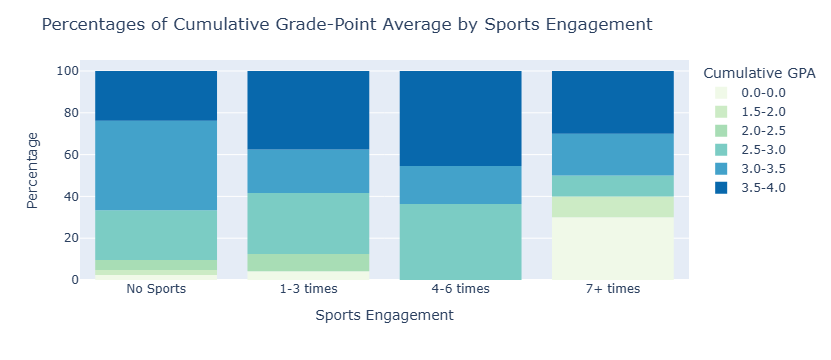

In [138]:
fig = px.histogram(DF_j.sort_values(by='cgpa'),
                   x='sports_engagement',
                   color='cgpa',
                   color_discrete_sequence=['#f0f9e8','#ccebc5','#a8ddb5','#7bccc4','#43a2ca','#0868ac'],
                   barnorm='percent',
                   category_orders={'sports_engagement' : ['No Sports','1-3 times','4-6 times','7+ times']})
fig.update_layout(title="Percentages of Cumulative Grade-Point Average by Sports Engagement",
                  xaxis_title='Sports Engagement',
                  yaxis_title='Percentage',
                  legend_title='Cumulative GPA')
fig.show()

There is a possible relationship between the amount of monthly sport engagement and cumulative GPA. It appears that a high frequency of sport engagement correlates to a greater probability of a worse GPA. Observations that reported no monthly sport engagement had the greatest percentage of GPAs of 3.0+. It appears that the percentage of very high (3.5-4.0) GPAs increases as sports engagement increases, reaching a peak when monthly sports engagement is 4-6 times. However, the pattern ends at this peak, and decreases for very high frequencies of sport engagement.

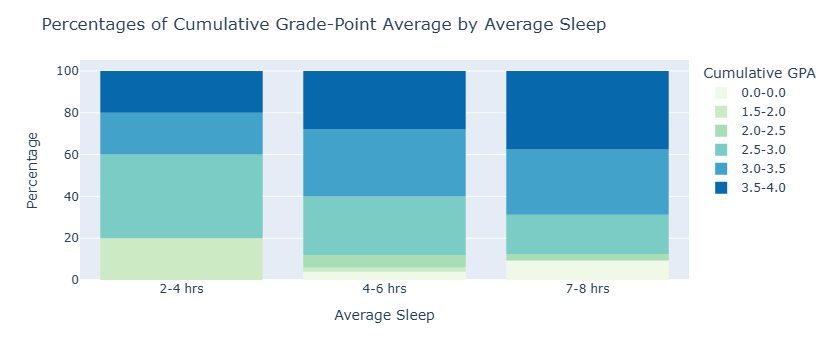

In [140]:
fig = px.histogram(DF_j.sort_values(by='cgpa'),
                   x='average_sleep',
                   color='cgpa',
                   color_discrete_sequence=['#f0f9e8','#ccebc5','#a8ddb5','#7bccc4','#43a2ca','#0868ac'],
                   barnorm='percent',
                   category_orders={'average_sleep' : ['2-4 hrs','4-6 hrs','7-8 hrs']})
fig.update_layout(title="Percentages of Cumulative Grade-Point Average by Average Sleep",
                  xaxis_title='Average Sleep',
                  yaxis_title='Percentage',
                  legend_title='Cumulative GPA')
fig.show()

There is a possible association between amount of sleep and cumulative GPA. Observations with greater amounts of average sleep tend to have higher frequencies of better GPAs. Frequency of high GPAs (3.0+) increase and the frequency of moderate to low GPAs (3.0-) decrease as amount of sleep increases.

#### Ruben

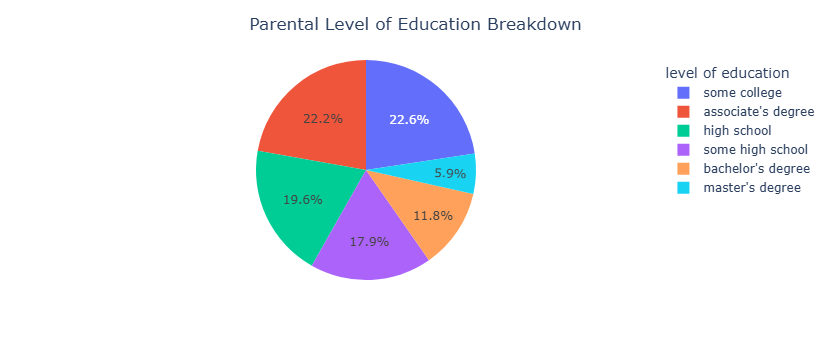

In [161]:
fig = px.pie(DF_ruben,
             names='parental level of education')
fig.update_layout(title=" Parental Level of Education Breakdown",
                  title_x=0.5,
                  legend_title="level of education")
fig.show()

In this we can see that the majority of the parents have some sort of college education but as the level of degree rises, their margins shrink. This is very imporant as we will use this variable as a focal point in the data exploration

In [164]:
order =  ["some high school","high school", "some college", "associate's degree","bachelor's degree","master's degree"]
DF_ruben['total score'] = DF_ruben['reading score'] + DF_ruben['writing score'] + DF_ruben['writing score']

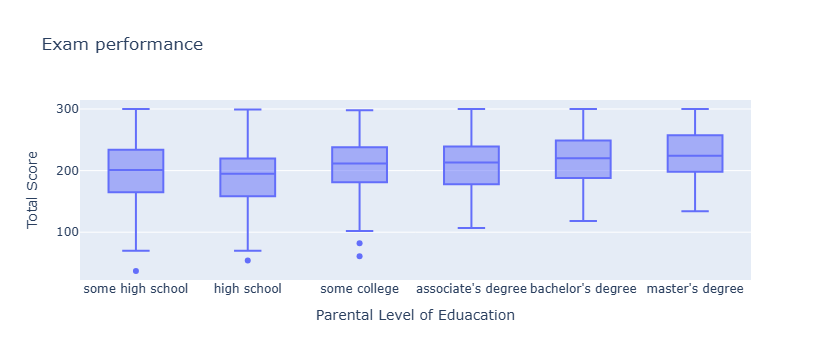

In [166]:
fig = px.box(
    DF_ruben,
    x='parental level of education',  
    y='total score',  
    title='Exam performance')

fig.update_layout(
    xaxis_title='Parental Level of Eduacation',
                  yaxis_title='Total Score',
    xaxis=dict(
        categoryorder="array",
        categoryarray=order))

fig.show()

As shown in the bar graph we can see that while the parents level of education doesnt limit the potential to score high on the exam, there is a steady increase in the minimum score for the students in each education level and that the mean score does tend to rise as the parents level of education increases. Considering this information, we can infer that as the parental level of education of each students rises, the student has a higher chance of recieving a higher overall score on their exam

## Conclusion